In [1]:
import numpy as np
import matplotlib.pyplot as plt

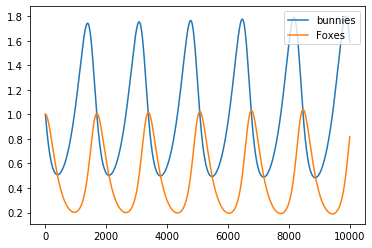

In [31]:
nsteps = 10000
a = 0.6
b = 1.2
c = 1
d =1
dt = .005

x = np.zeros(nsteps)
y = np.zeros(nsteps)

x[0] = 1
y[0] =1

for t in range(1,nsteps):
    x[t] = x[t-1] + dt*(a*x[t-1] - b*x[t-1]*y[t-1])
    y[t] = y[t-1] + dt*(c*x[t-1]*y[t-1] - d*y[t-1])
    
#figure

fig = plt.figure();
plt.plot(x, label = 'bunnies');
plt.plot(y, label = 'Foxes');
plt.legend(loc = 'upper right');

Text(0, 0.5, 'foxes')

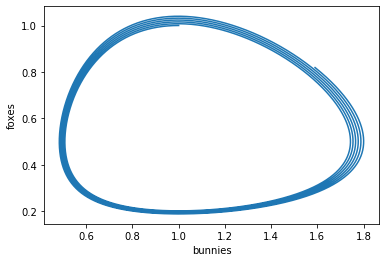

In [43]:
plt.plot(x,y)
plt.xlabel('bunnies')
plt.ylabel('foxes')

In [16]:
def rabbits(R, birthrate, deathrate):
    """Creates a generator that produces an infinite supply of rabbits.
        R: the initial population of rabbits
        birthrate & deathrate: proportion of rabbits that 
        reproduce every time step"""
    while True:
        r = (birthrate - deathrate)
        R += R*r
        yield R

In [17]:
rabbits?

In [21]:
weeks = range(200)

# create a population of 10 rabbits with a 3% growth rate
r = rabbits(10, 0.03, 0.01)
pop = [next(r) for w in weeks]

# What is the population every 25 iterations?
pop[::25]

[10.2,
 16.73418114354024,
 27.454197896550774,
 45.04152164230217,
 73.8953904061738,
 121.23322046368024,
 198.89594822097794,
 326.30988492608293]

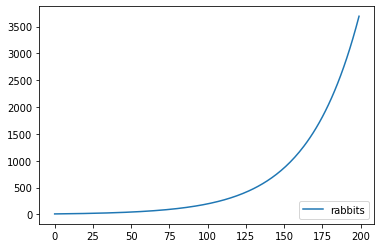

In [19]:
plt.plot(weeks, pop, label='rabbits')
plt.legend(loc='lower right')

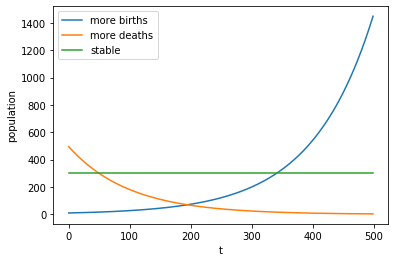

In [22]:
def plot_pop(gen, n_weeks, label='rabbits'):
    """Plot a population generator on standard axes."""
    w = range(n_weeks)
    pop = [next(gen) for i in w]
    plt.xlabel('t')
    plt.ylabel('population')
    plt.plot(w, pop, label=label)

max_t = 500
plot_pop(rabbits(10, 0.02, 0.01), max_t, 'more births')
plot_pop(rabbits(500, 0.01, 0.02), max_t, 'more deaths')
plot_pop(rabbits(300, 0.01, 0.01), max_t, 'stable')
plt.legend(loc='upper left')


In [32]:
def rabbits2(R, birthrate, deathrate, max_rabbits):
    """Creates a generator that produces an supply of rabbits.
        R: the initial population of rabbits
        birthrate & deathrate: proportion of rabbits that 
        reproduce or die every time step
        max_rabbits: the maximum sustainable population of rabbits."""
    R = float(R)
    while True:
        r = birthrate - deathrate
        k = (max_rabbits - R) / max_rabbits
        R += R*k*r
        yield R

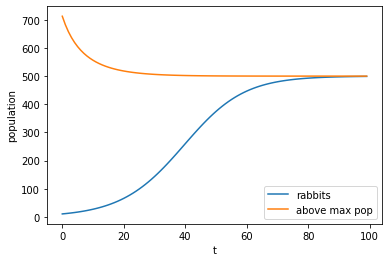

In [35]:
max_t = 100
plot_pop(rabbits2(10, 0.2, 0.1, 500), max_t)
plot_pop(rabbits2(750, 0.2, 0.1, 500), max_t, 'above max pop')
plt.legend(loc='lower right')

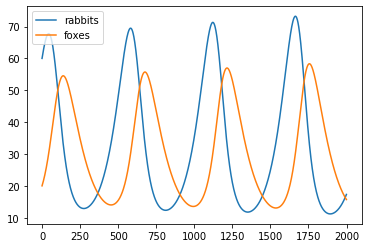

In [38]:
weeks     =  range(2000)
ecosystem = {'rabbits': [60],
             'foxes':   [20]}

params    = {'rabbit_birthrate': 0.015,
             'rabbit_evasion':   0.0005,  # The chances of a rabbit being eaten by _one_ fox
             'fox_deathrate':    0.01,
             'fox_efficiency':   0.0003}

def breed_rabbits(R, F, evasion, birthrate):
    return R + R*(birthrate - F*evasion)

def breed_foxes(F, R, efficiency, deathrate):
    return F + F*(R*efficiency - deathrate)

for w in weeks[:-1]:
    r, f = ecosystem['rabbits'][-1], ecosystem['foxes'][-1]
    ecosystem['rabbits'].append(breed_rabbits(r, f, params['rabbit_evasion'], params['rabbit_birthrate']))
    ecosystem['foxes'].append(breed_foxes(f, r, params['fox_efficiency'], params['fox_deathrate']))

for species, pop in ecosystem.items():
    plt.plot(weeks, pop, label=species)

plt.legend(loc='upper left')